#### From the business problem , here we have to findout what are the customers are likely to purchased the book i.e., The Art History of Florence.
#### From the data we have, here "Florence" is dependent variable while rest of it is Independent variable. 

#### So, basically the dependent variable is in categorical form with a binary response.

In [1]:
## Loading the require libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
## Loading the dataset.

florence = pd.read_csv("C:/Users/SACHIN/Desktop/Classification/Classification/Classification_data.csv")

In [6]:
## Viewing the dataset (above 6)

florence.head(6)

,Seq#,ID#,Florence,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Related Purchase
0,1,25,0,1,297,14,2,22,0,1,1,0,0,0,0,0,0,0,0
1,2,29,0,0,128,8,2,10,0,0,0,0,0,0,0,0,0,0,0
2,3,46,0,1,138,22,7,56,2,1,2,0,1,0,1,1,0,0,2
3,4,47,0,1,228,2,1,2,0,0,0,0,0,0,0,0,0,0,0
4,5,51,0,1,257,10,1,10,0,0,0,0,0,0,0,0,0,0,0
5,6,60,0,1,145,6,2,12,0,0,0,0,0,0,0,0,0,0,0


In [7]:
## Getting the dimension of dataset

florence.shape

(4000, 19)

#### Here we have 4000 datapoints and 19 variable.

In [8]:
## Getting the info of the dataset 

florence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
Seq#                4000 non-null int64
ID#                 4000 non-null int64
Florence            4000 non-null int64
Gender              4000 non-null int64
M                   4000 non-null int64
R                   4000 non-null int64
F                   4000 non-null int64
FirstPurch          4000 non-null int64
ChildBks            4000 non-null int64
YouthBks            4000 non-null int64
CookBks             4000 non-null int64
DoItYBks            4000 non-null int64
RefBks              4000 non-null int64
ArtBks              4000 non-null int64
GeogBks             4000 non-null int64
ItalCook            4000 non-null int64
ItalAtlas           4000 non-null int64
ItalArt             4000 non-null int64
Related Purchase    4000 non-null int64
dtypes: int64(19)
memory usage: 593.8 KB


In [9]:
## Now, checking for any missing value 

florence.isnull().sum()

Seq#                0
ID#                 0
Florence            0
Gender              0
M                   0
R                   0
F                   0
FirstPurch          0
ChildBks            0
YouthBks            0
CookBks             0
DoItYBks            0
RefBks              0
ArtBks              0
GeogBks             0
ItalCook            0
ItalAtlas           0
ItalArt             0
Related Purchase    0
dtype: int64

#### There are no missing value in the dataset hence we can move further process.

In [13]:
## As here florence is the dependent variable we will checkout the number if counts.

florence["Florence"].value_counts()

0    3662
1     338
Name: Florence, dtype: int64

In [20]:
## Getting out the percentage of response variable.

No = len(florence[florence["Florence"] == 0])
Yes = len(florence[florence["Florence"] == 1])

print("Percentage of No:", No/(Yes+No)*100)
print("Percentage of Yes:", Yes/(No+Yes) * 100)

Percentage of No: 91.55
Percentage of Yes: 8.450000000000001


#### Here No is refer as '0' and Yes is refer as '1'

#### We can see that the "Yes" response has less than 10% which is too low, it is a sign of Class Imbalance Problem.

In [21]:
## Getting the basic statistics

florence.describe()

,Seq#,ID#,Florence,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Related Purchase
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,16594.623000,0.084500,0.704500,208.091500,13.390500,3.833250,26.50725,0.639750,0.30475,0.731250,0.350750,0.256250,0.28900,0.387500,0.125250,0.037500,0.045750,0.885000
std,1154.844867,9484.433792,0.278171,0.456324,100.948548,8.103822,3.458386,18.35138,0.994343,0.61194,1.089413,0.687999,0.558269,0.60089,0.750656,0.385486,0.214721,0.220611,1.226234
min,1.000000,25.000000,0.000000,0.000000,15.000000,2.000000,1.000000,2.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1000.750000,8253.250000,0.000000,0.000000,129.000000,8.000000,1.000000,12.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2000.500000,16581.000000,0.000000,1.000000,208.000000,12.000000,2.000000,20.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3000.250000,24838.250000,0.000000,1.000000,283.000000,16.000000,6.000000,36.00000,1.000000,0.00000,1.000000,1.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,1.000000
max,4000.000000,32977.000000,1.000000,1.000000,479.000000,36.000000,12.000000,99.00000,7.000000,5.00000,7.000000,5.000000,4.000000,5.00000,6.000000,3.000000,2.000000,2.000000,8.000000


In [25]:
## From the data, "Seq#" and ID# are constant so dropping it.

florence_new = florence.drop(["Seq#", "ID#"], axis = 1)
florence_new.head()

,Florence,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Related Purchase
0,0,1,297,14,2,22,0,1,1,0,0,0,0,0,0,0,0
1,0,0,128,8,2,10,0,0,0,0,0,0,0,0,0,0,0
2,0,1,138,22,7,56,2,1,2,0,1,0,1,1,0,0,2
3,0,1,228,2,1,2,0,0,0,0,0,0,0,0,0,0,0
4,0,1,257,10,1,10,0,0,0,0,0,0,0,0,0,0,0


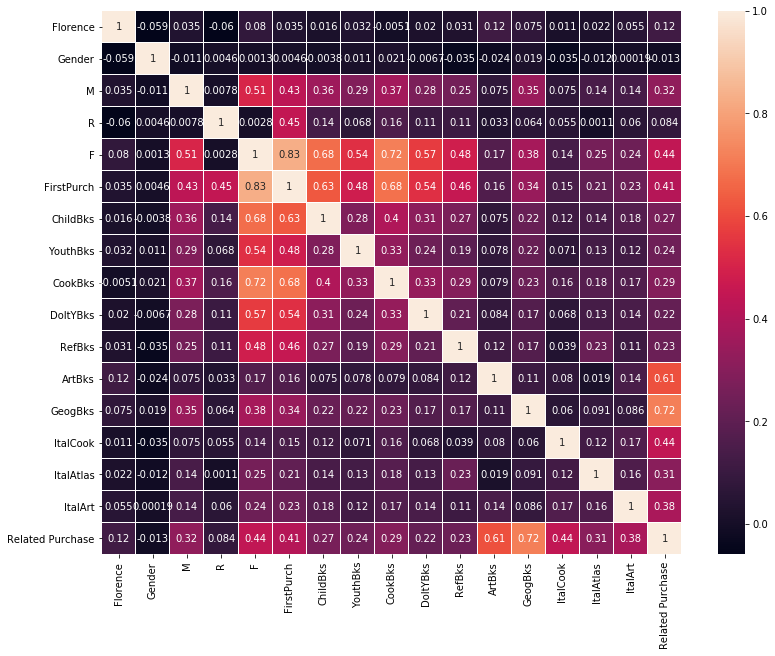

In [31]:
## Lets find out the correlation between the variable 

## Loading the require libraries
import seaborn as sns

plt.figure(figsize = (13,10))
sns.heatmap(florence_new.corr(), annot = True, linewidths = 0.01)


#### Since there are two to three variable which are highly correlated to each other.

In [91]:
## Dividing the data into training and test for model building 

X = florence_new.drop(columns = ["Florence"], axis = 1)
Y = florence_new["Florence"]

In [92]:
## Importing the require libraries for training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 42)

print("X_train:", Y_train.shape)
print("X_test:", X_test.shape)
print("Y_train:", Y_train.shape)
print("Y_test:", Y_test.shape)


X_train: (2800,)
X_test: (1200, 16)
Y_train: (2800,)
Y_test: (1200,)


#### Training data has 2800 datapoint and Testing data has 1200.

In [93]:
## Building the model for Logistic Regression

## Getting the required libraries
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [94]:
le = LogisticRegression()
model = le.fit(X_train, Y_train)
model

C:\Users\SACHIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [95]:
## Building the model

model_stat = sm.GLM(Y_train, sm.add_constant(X_train), family = sm.families.Binomial())
result = model_stat.fit().summary()
result

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Florence   No. Observations:                 2800
Model:                            GLM   Df Residuals:                     2784
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -759.86
Date:                Thu, 14 Feb 2019   Deviance:                       1519.7
Time:                        13:58:56   Pearson chi2:                 2.89e+03
No. Iterations:                     6   Covariance Type:             nonrobust
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.2228      0.237     -9.368      0.000      -2.688      -1.758
Gender              -0.5122      0.144     -3.566      0.000      -0.794      -0.231
M                   -0.0011      0.001     -1.372      0.170      -0.003       0.000
R                   -0.0151      0.014     -1.056      0.291      -0.043       0.013
F                    0.2549      0.062      4.100      0.000       0.133       0.377
FirstPurch           0.0011      0.010      0.107      0.915      -0.019       0.022
ChildBks            -0.2822      0.100     -2.810      0.005      -0.479      -0.085
YouthBks            -0.1595      0.139     -1.152      0.249      -0.431       0.112
CookBks             -0.4471      0.103     -4.347      0.000      -0.649      -0.245
DoItYBks            -0.4417      0.135     -3.276      0.001      -0.706      -0.177
RefBks              -0.0543      0.139     -0.390      0.696      -0.327       0.218
ArtBks               0.2760      0.108      2.554      0.011       0.064       0.488
GeogBks              0.0186      0.098      0.189      0.850      -0.174       0.212
ItalCook            -0.1502      0.177     -0.848      0.396      -0.497       0.197
ItalAtlas           -0.2995      0.286     -1.049      0.294      -0.859       0.260
ItalArt              0.2920      0.243      1.202      0.229      -0.184       0.768
Related Purchase     0.1370      0.069      1.999      0.046       0.003       0.271
====================================================================================
"""

In [96]:
## Prediction

result_predict = model.predict(X_test)

In [97]:
## Finding out the Accuracy, Confusion Matrix, ROC Curve

from sklearn.metrics import accuracy_score, classification_report, auc, confusion_matrix

In [98]:
## Confusion Matrix

confusion_matrix(result_predict, Y_test)

array([[1100,   99],
       [   0,    1]], dtype=int64)

In [99]:
accuracy_score(result_predict, Y_test)

0.9175

In [100]:
## Area under Curve

from sklearn.metrics import roc_auc_score

roc_auc_score(result_predict, Y_test)

0.9587155963302753

In [102]:
## Checking Accuracy for training data

result_predict_train = model.predict(X_train)
confusion_matrix(result_predict_train, Y_train)

array([[2562,  233],
       [   0,    5]], dtype=int64)

In [104]:
## Accuracy

accuracy_score(result_predict_train, Y_train)

0.9167857142857143

#### As we can see that the Accuracy score of both the testing and training is almost near to it, we can say that our model is not overfitting.

In [110]:
## Building the Support Vector Machine models

## Getting the require libraries

from sklearn.ensemble import RandomForestClassifier

random = RandomForestClassifier()
model_random = random.fit(X_train, Y_train)
model_random

C:\Users\SACHIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [111]:
## Prediction

random_predict = model_random.predict(X_test)

In [113]:
## Confusion Matrix

confusion_matrix(random_predict, Y_test)

array([[1080,   97],
       [  20,    3]], dtype=int64)

In [114]:
## Accuracy Score

accuracy_score(random_predict, Y_test)

0.9025

In [115]:
## AUC value

roc_auc_score(random_predict, Y_test)

0.5240109342100402

In [118]:
## For training data

predict_random_train = model_random.predict(X_train)

## Accuracy
accuracy_score(predict_random_train, Y_train)

0.9842857142857143

#### We can see that the data is training data and testing data value are too differ this is a sign of Overfitting in the model.
#### We can avoide this by tuning the hyperparameter or by finding out the best parameters.


##### From the above two models, Logistic Regression perform much better than Random Forest Classifier.
##### May be If we tune the Hyperparameters in random forest may there is chance that random forest perform much better than Logistic Regression.

#### Based on Accuracy ,confusion Matrix and Area under the curve Logistic Regression gives better performance.